In [10]:
import numpy as np
import numpy.random as rnd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

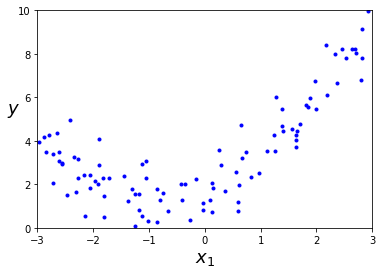

In [11]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #훈련데이터 각 특성을 제곱하여 새로운 특성으로 추가
X_poly = poly_features.fit_transform(X)

In [13]:
print(X[0])
print(X_poly[0])

# X는 원래 특성 , X_poly는 원래특성과 원래특성의 제곱을 가지고 있다.

[-0.75275929]
[-0.75275929  0.56664654]


In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) 

lin_reg.intercept_, lin_reg.coef_
# y를 살펴보면 intercept는 2, coef는 0.5와 1이다.
# 얼추 비슷하게 잘 맞췄다.


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

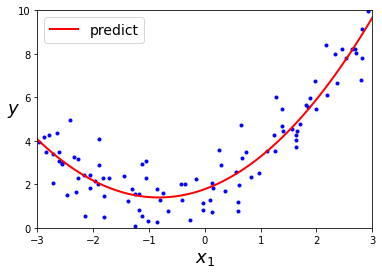

In [15]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # -3에서 3사이에 일정한 값을 가진 100개의 array를 만들고
                                                # reshape으로 100행 1열로 만듬
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="predict")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()
# 가우시안 정도의 노이즈가 있었지만 다항함수에서도 꽤 잘맞는 모델을 만들수 있다. 선형회귀로.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  Pipeline

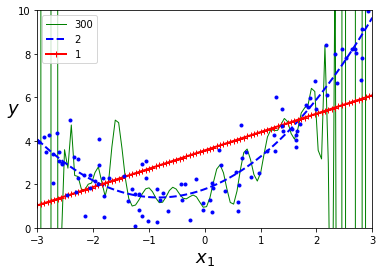

In [17]:
for style, width, degree in (("g-",1,300), ("b--",2,2), ("r-+",2,1)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg)
  ])
  polynomial_regression.fit(X, y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# 같은 y에 대해 선형, 2차 300차 회귀를 가시화한 것이다.
# 선형(1차)는 underfitting, 300차는 overfitting문제가 발생한다.